# Project: tmdb-movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Dataset**:  This movie dataset contains information about 10,000 movies including genres, ratings, revenue, budget, and more. It contains movies which are released between 1960 and 2015
>
> **Questions**:
   <ul>
   <li> Which director who has done more movies?</li>
   <li> Which year were so many films released?</li>
   <li> What is the relation between budget and the popularity of the film?</li>
   <li> Which director has the most popular movies?</li>
   <li> How has a movie budget changed over the years?</li>
   </ul>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
# types and look for instances of missing or possibly errant data.
# we want to see if there is null values and duplicated in the data or not 
tmdb_movies = pd.read_csv('tmdb-movies.csv')

In [3]:
tmdb_movies

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


In [4]:
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
tmdb_movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [6]:
tmdb_movies.id.value_counts()

42194     2
2047      1
251232    1
19819     1
279914    1
         ..
123553    1
10912     1
15674     1
19100     1
16384     1
Name: id, Length: 10865, dtype: int64

In [7]:
tmdb_movies.imdb_id.value_counts()

tt0411951    2
tt2092011    1
tt0376136    1
tt4007494    1
tt0077215    1
            ..
tt1389762    1
tt1650048    1
tt1745862    1
tt0462244    1
tt0800320    1
Name: imdb_id, Length: 10855, dtype: int64

In [8]:
tmdb_movies.original_title.value_counts()

Hamlet                            4
The Three Musketeers              3
Frankenstein                      3
Emma                              3
Alice in Wonderland               3
                                 ..
The Last Wave                     1
Clear and Present Danger          1
Dawn of the Planet of the Apes    1
White Chicks                      1
My Summer of Love                 1
Name: original_title, Length: 10571, dtype: int64

In [9]:
tmdb_movies.isnull()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,False,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
10862,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
10863,False,False,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False
10864,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
tmdb_movies.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [11]:
tmdb_movies.duplicated().sum()

1

In [12]:
tmdb_movies.shape

(10866, 21)

In [13]:
# Data has two duplicated rows
# Data has null values.

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

In [14]:
# After discussing the structure of the data and any problems that need to be
# cleaned, perform those cleaning steps in the second part of this section.
# And to avoid in the original data i copy the data in another file
tmdb_movies_clean = tmdb_movies.copy()

In [15]:
# Making function to clean the data from null values 
def Clean (x):
    x.fillna('', inplace=True)

In [16]:
Clean (tmdb_movies_clean.cast)
Clean (tmdb_movies_clean.genres)
Clean (tmdb_movies_clean.director)
Clean (tmdb_movies_clean.production_companies)
Clean (tmdb_movies_clean.homepage)
Clean (tmdb_movies_clean.tagline)
Clean (tmdb_movies_clean.overview)
Clean (tmdb_movies_clean.keywords)
Clean (tmdb_movies_clean.imdb_id)

In [17]:
tmdb_movies_clean.isna().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
homepage                0
director                0
tagline                 0
keywords                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
dtype: int64

In [18]:
tmdb_movies_clean = tmdb_movies_clean.drop_duplicates().reset_index(drop = True)

In [19]:
tmdb_movies_clean

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10860,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,,Bruce Brown,,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000e+00,0.000000e+00
10861,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000e+00,0.000000e+00
10862,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,,Eldar Ryazanov,,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000e+00,0.000000e+00
10863,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000e+00,0.000000e+00


In [20]:
tmdb_movies_clean['release_date'] = pd.to_datetime(tmdb_movies_clean['release_date'])

In [21]:
tmdb_movies_clean.shape

(10865, 21)

In [29]:
# Now the new file is cleaning from null values and duplicated 

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1 (Which director who has done more movies? )

In [23]:
# Making function to visualization the data
def visualization (x,y,z,t,d,s,a):
    #In first step we take the first four parameter
    x.plot(kind = y ,color = sns.color_palette(z,len(x)),figsize=(60,t),fontsize=40,width = 0.8,edgecolor = 'darkblue')
    #Then we take the rest of parameter
    #The title of plot
    plt.title(d ,fontsize=70)
    #x axis label
    plt.xlabel(s ,fontsize=50)
    #y axis label
    plt.ylabel(a,fontsize= 50)
    

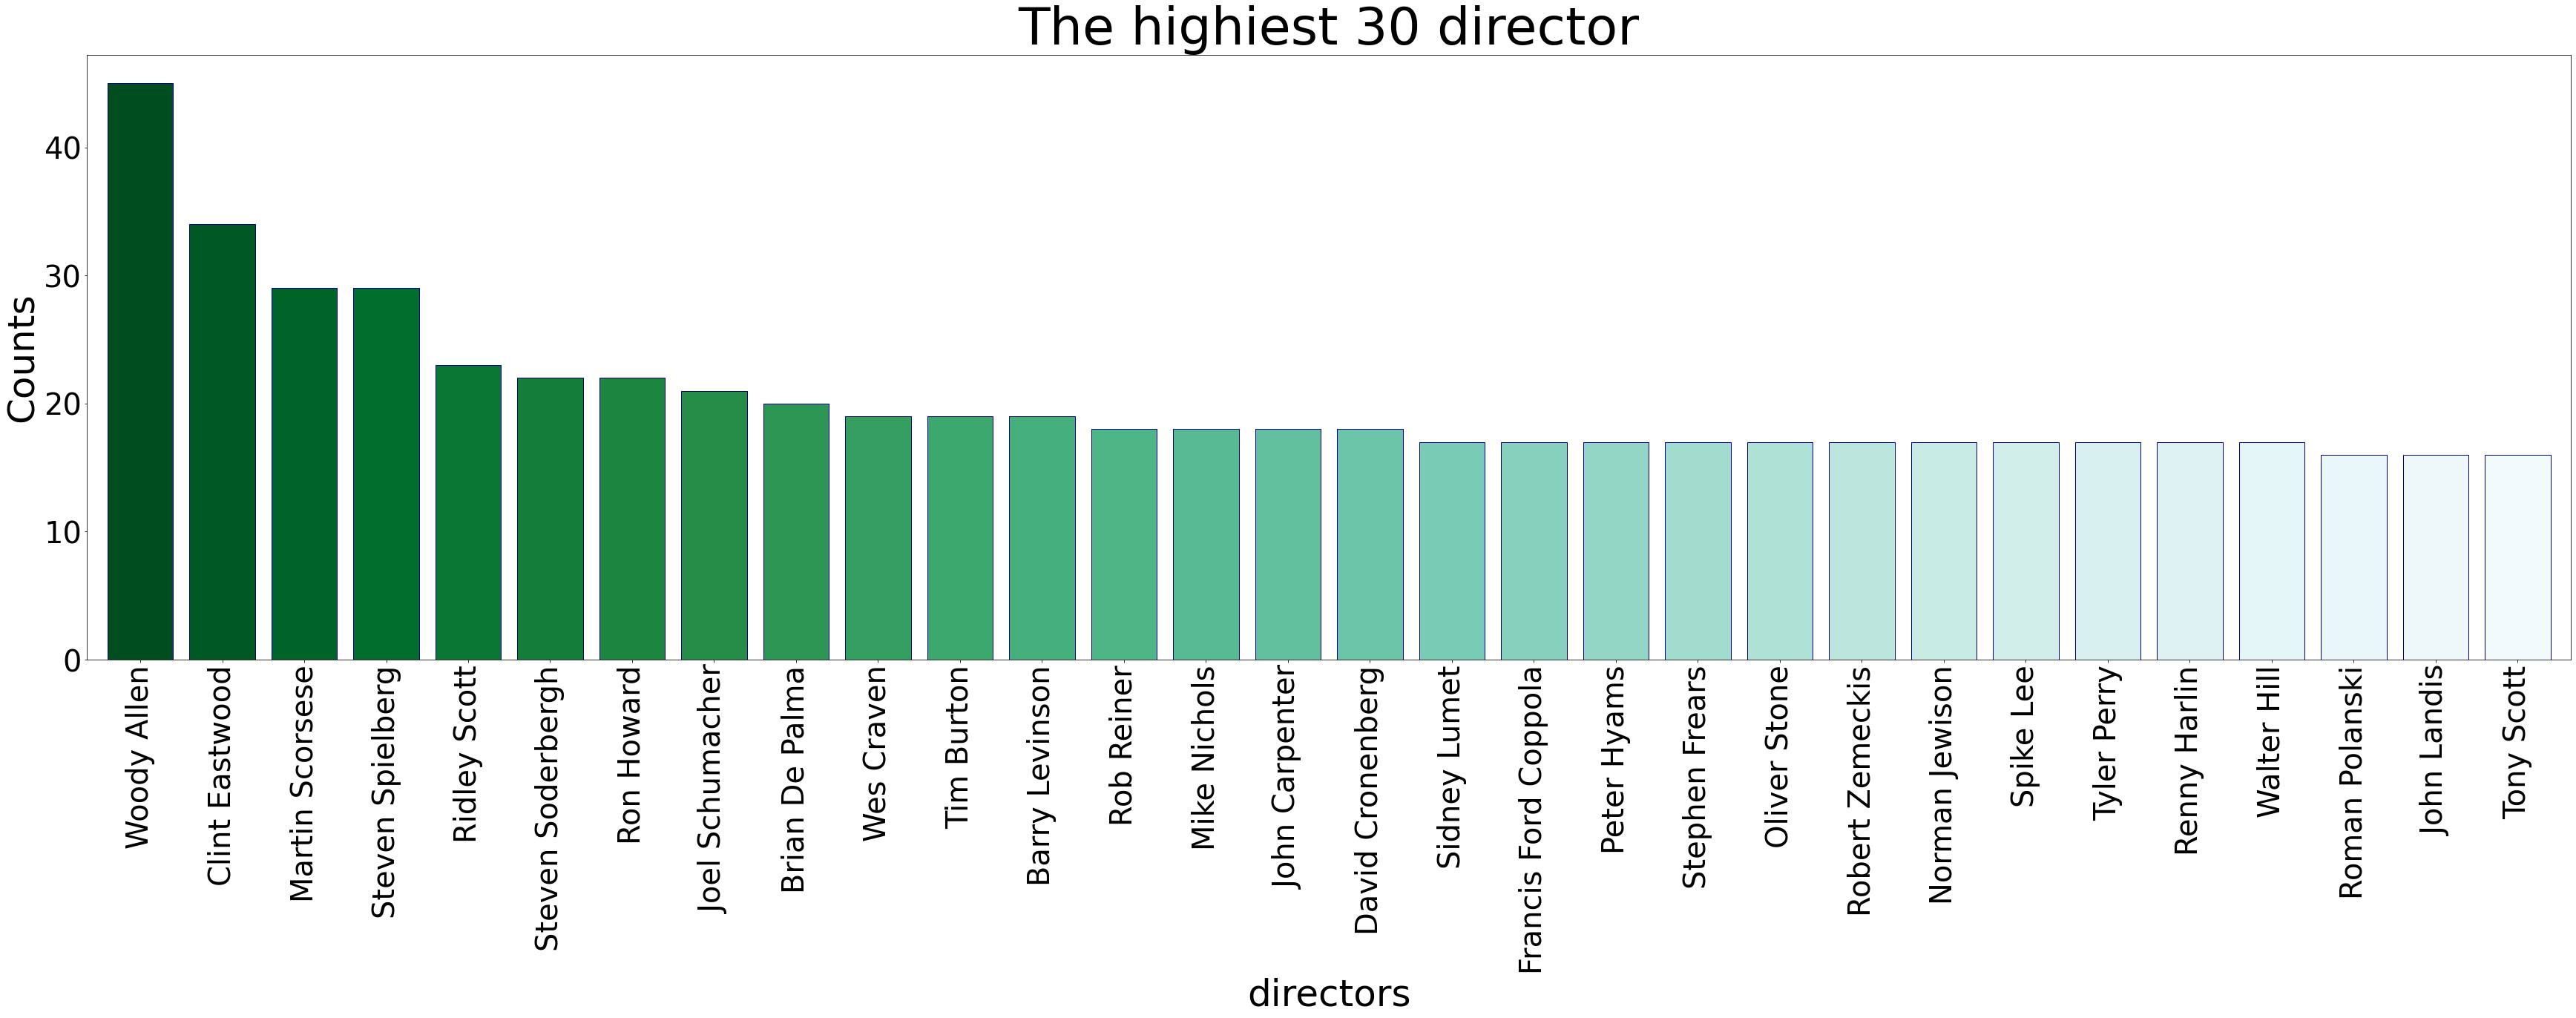

In [24]:
# copy the data to make operation in the new data and avoid the cleaning data
tmdb_movies_clean1 = tmdb_movies_clean.copy()
# We want to avoid the ''value in the data
tmdb_movies_clean1.drop(tmdb_movies_clean1[tmdb_movies_clean1['director'] == '' ].index, inplace = True)
x = tmdb_movies_clean1.director.value_counts()[:30]
visualization(x,'bar','BuGn_r', 15,"The highiest 30 director","directors","Counts")

### Research Question 2  (Which year were so many films released?)

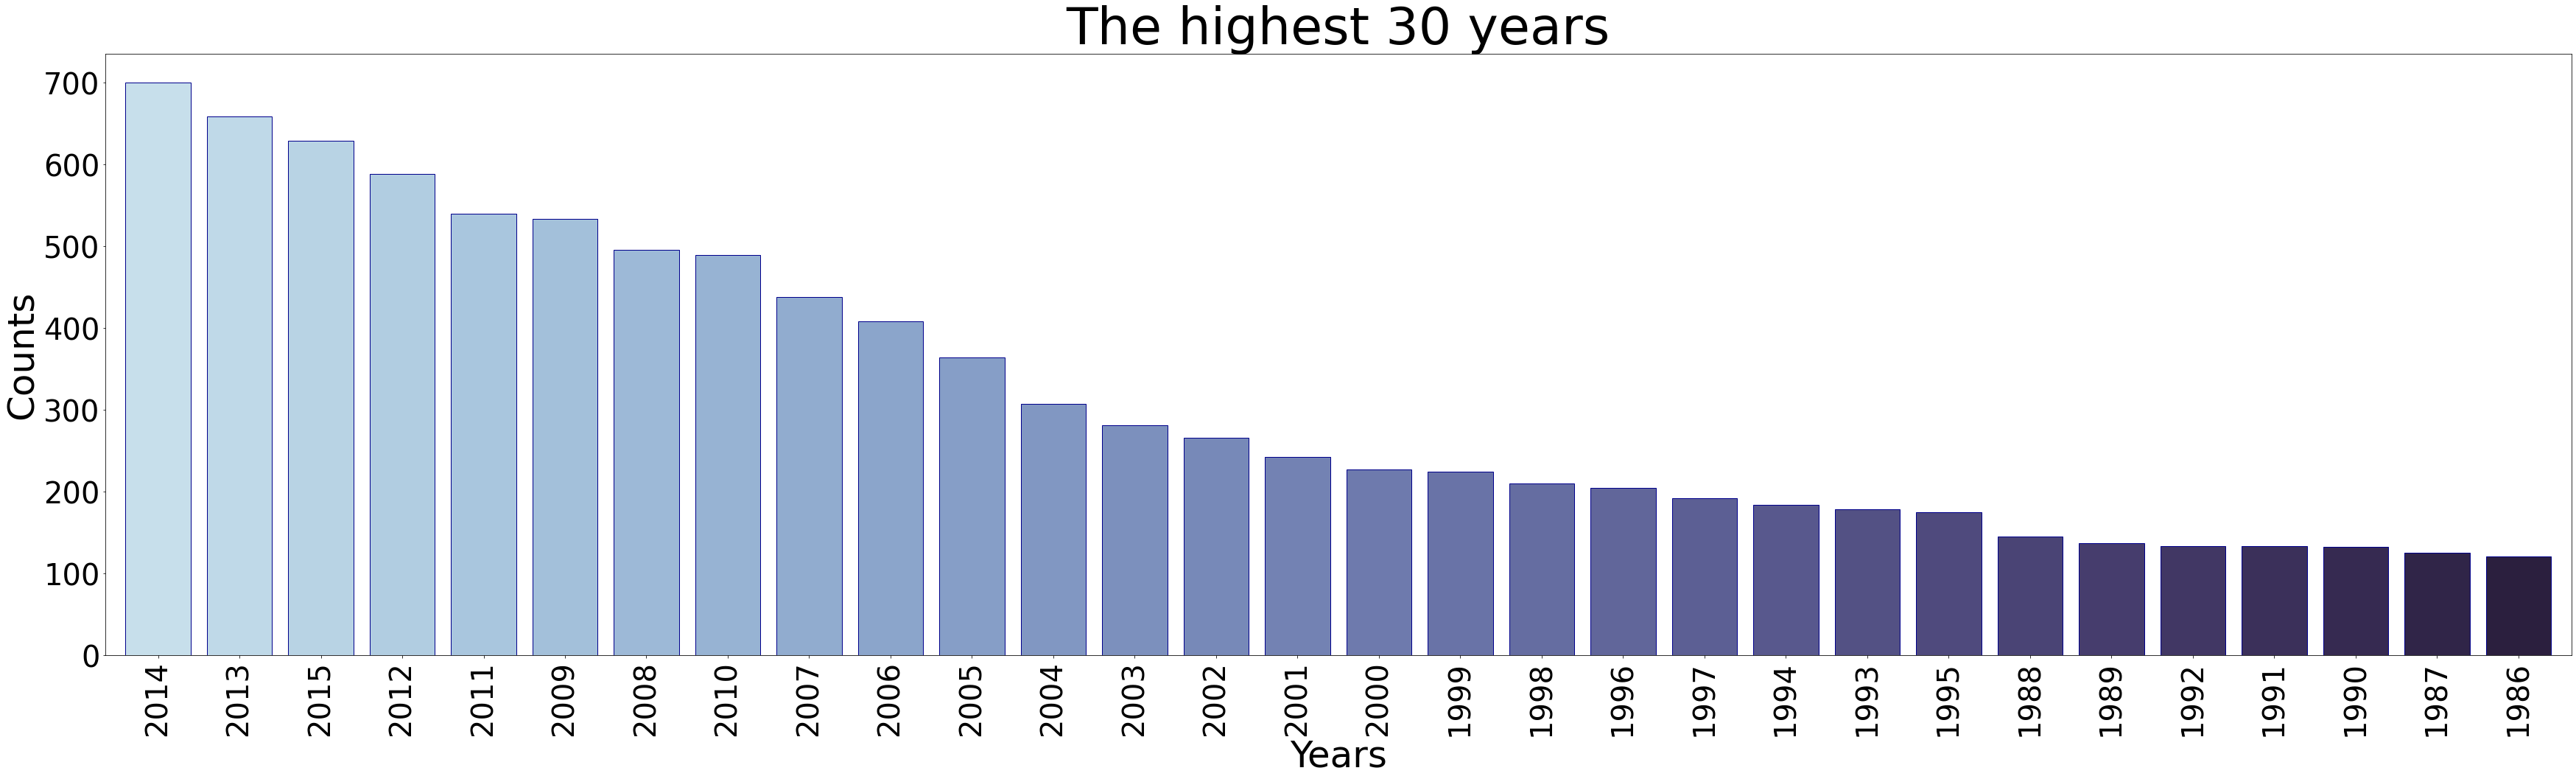

In [25]:
#taking the highest 30 year by value_counts
x = tmdb_movies_clean.release_year.value_counts()[:30]
visualization (x,'bar',"ch:s=.25,rot=-.25",15,"The highest 30 years","Years","Counts")

### Over the years, the release of films is increasing 

### Research Question 3  (What is the relation between budget and the popularity of the film?)

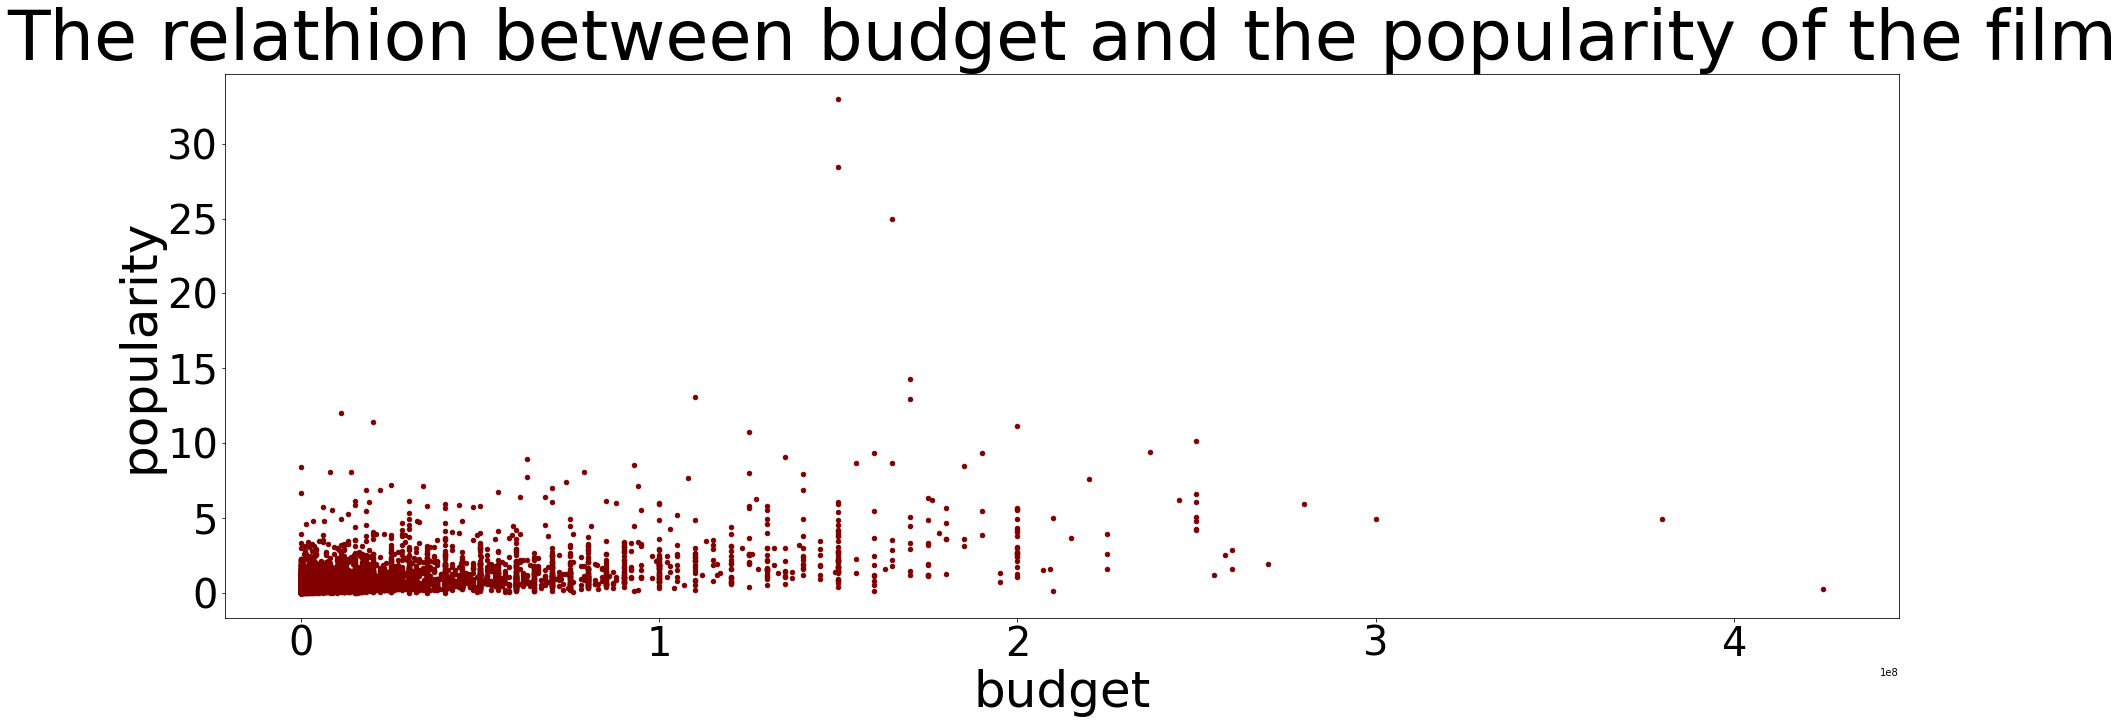

In [26]:
tmdb_movies_clean.plot(x='budget', y='popularity', kind='scatter',c = 'maroon',figsize = (30,10),fontsize=40)

plt.title("The relathion between budget and the popularity of the film",fontsize=70)
#x axis label
plt.xlabel('budget',fontsize=50)
#y axis label
plt.ylabel("popularity",fontsize= 50)

plt.show()

### The most popularity film hasn't have the highest budget

### Research Question 4 (Which director has the most popular movies?)

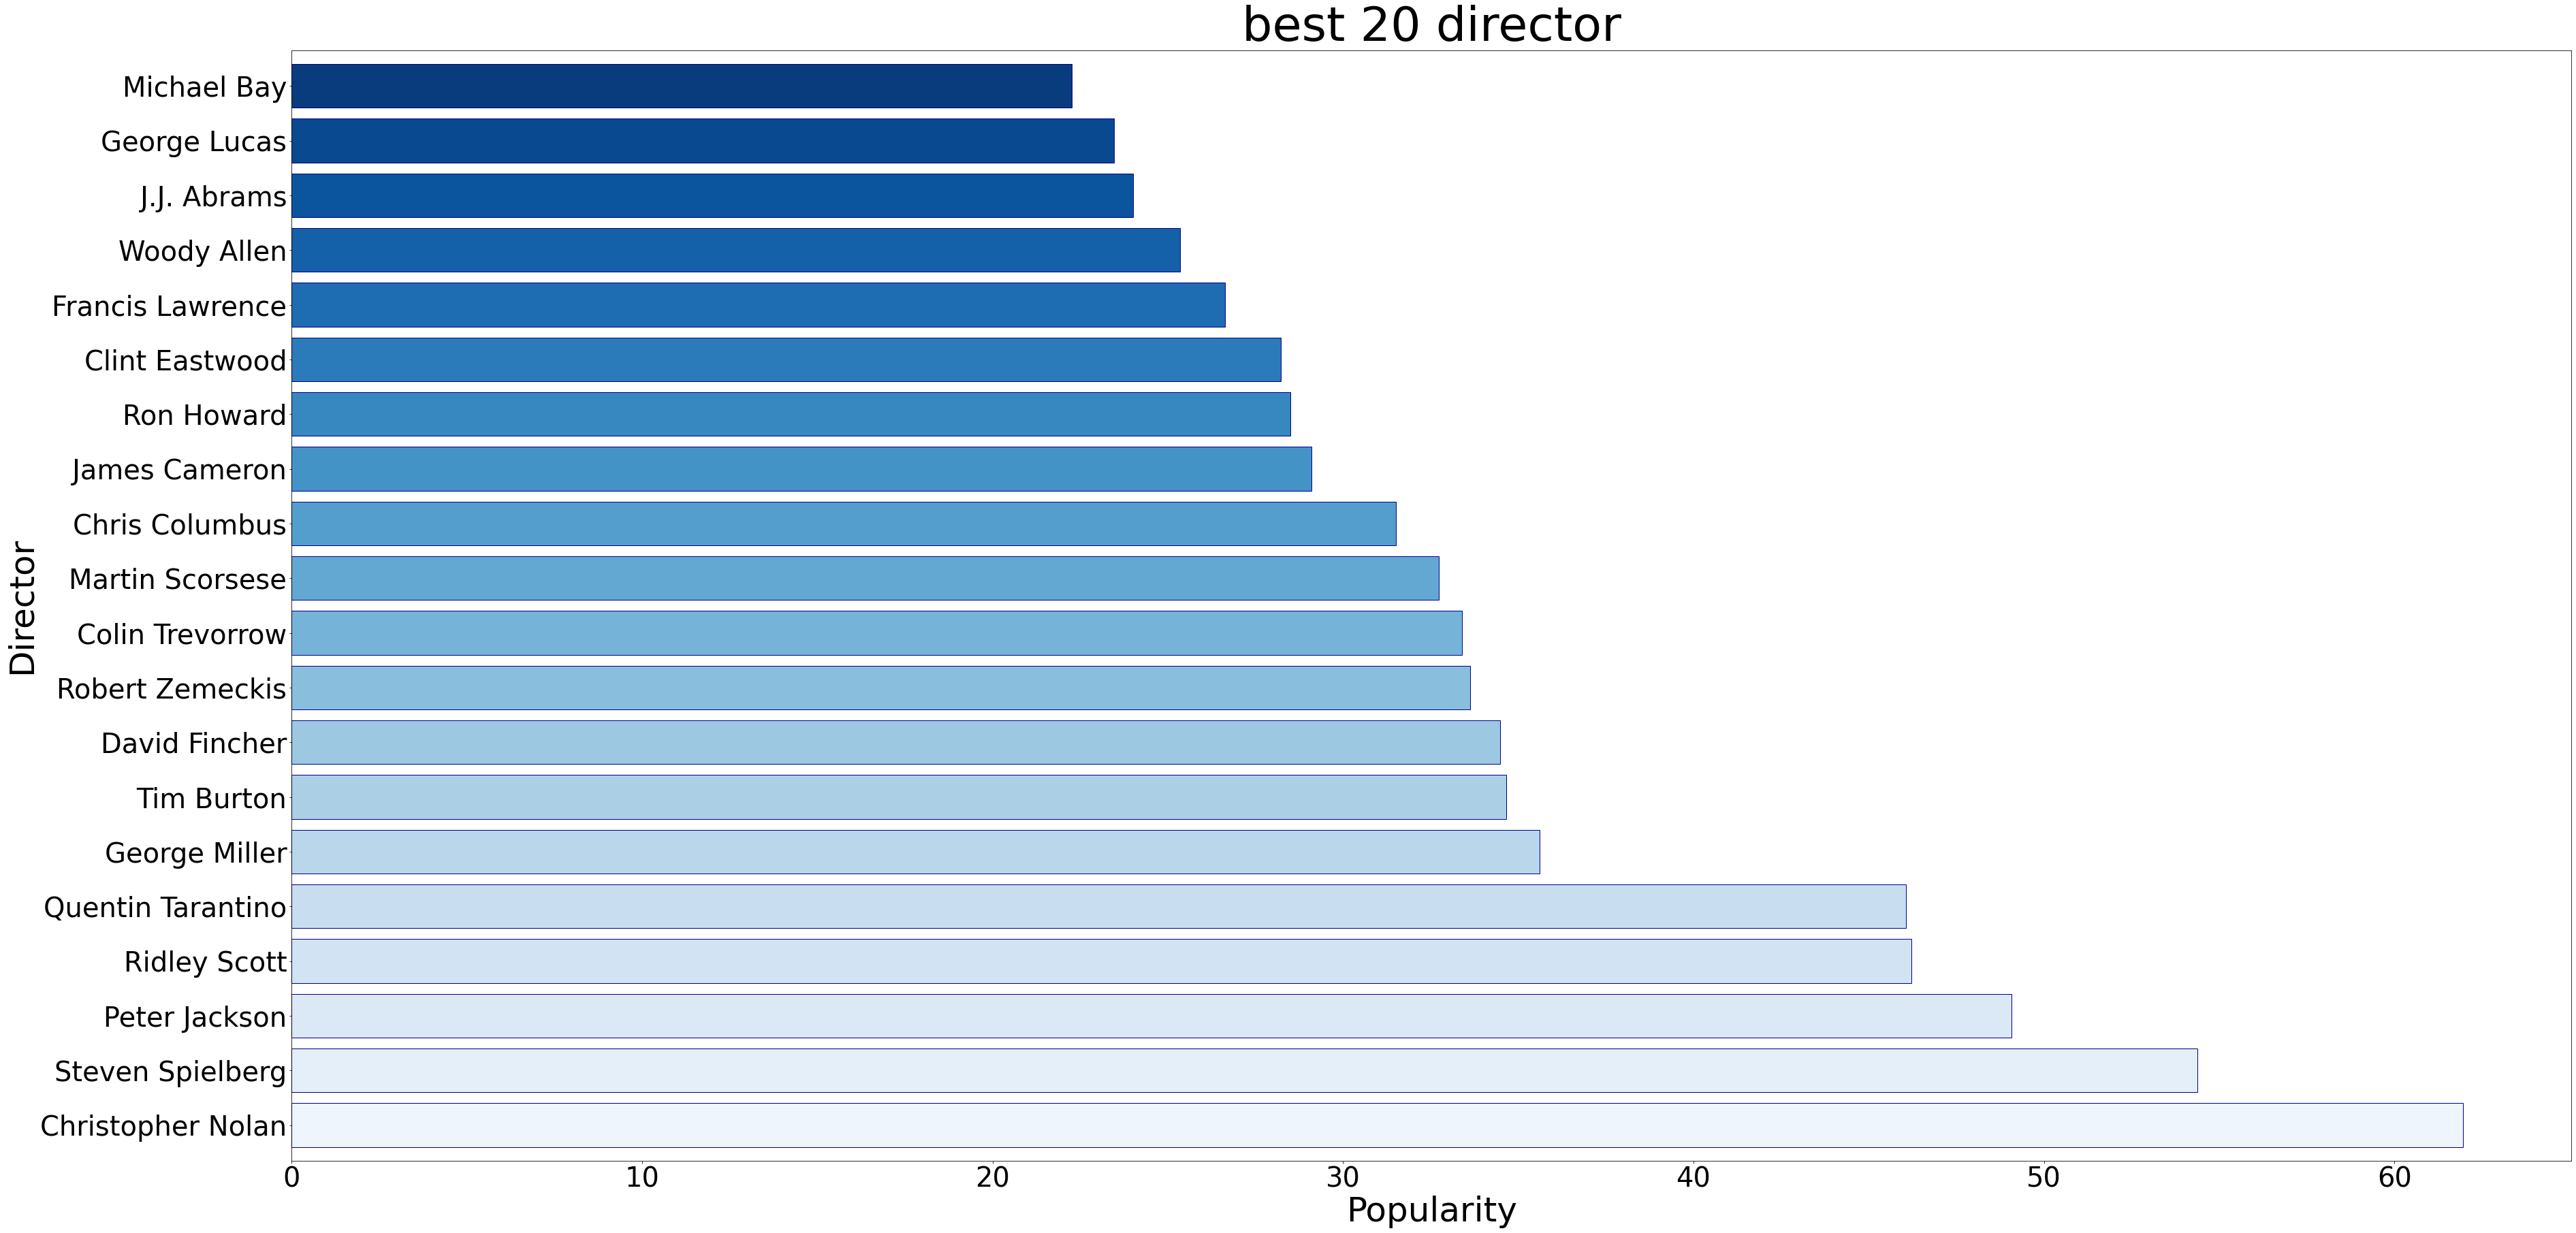

In [27]:
#we want every director with hispopularity from his films
X= tmdb_movies_clean.groupby('director').popularity.sum().sort_values(ascending=False)[:20]
visualization (X,'barh',"Blues",30,"best 20 director",'Popularity',"Director")

### Research Question 5 (How has a movie budget changed over the years?)

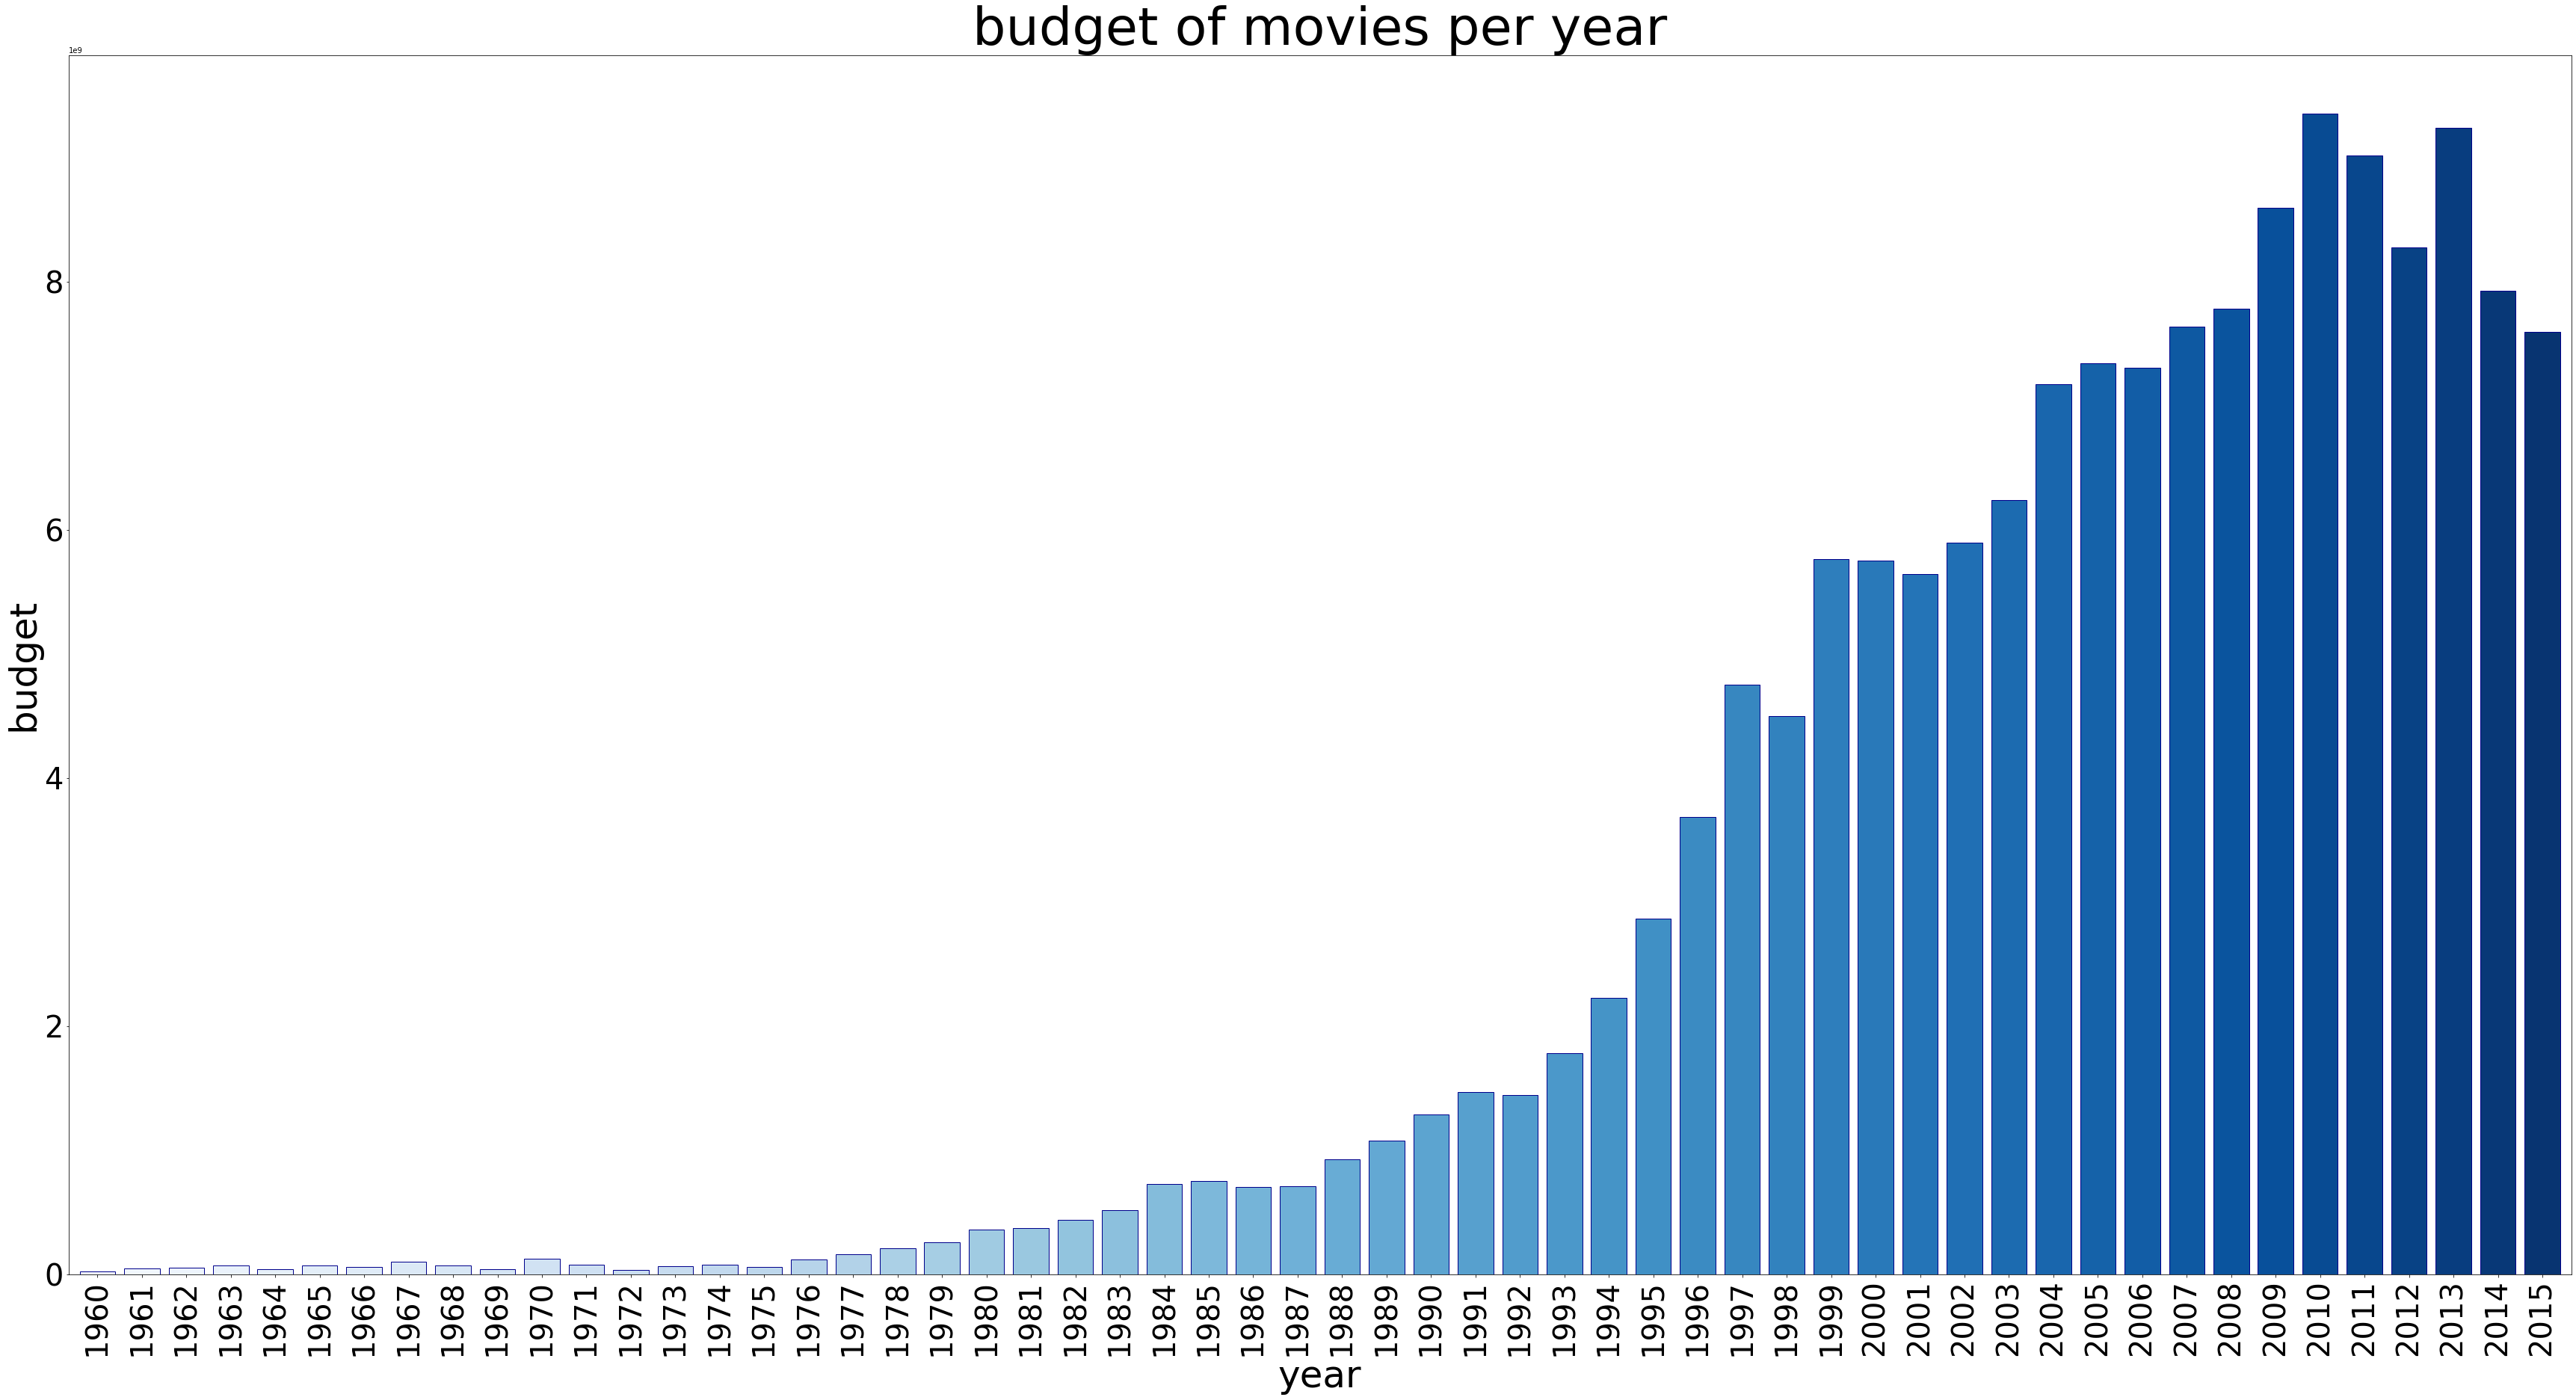

In [28]:
x= tmdb_movies_clean.groupby('release_year').budget.sum()[:60]
visualization (x,'bar',"Blues",30,"budget of movies per year",'year','budget')

### The budget of the movies increasing by the years 

<a id='conclusions'></a>
## Conclusions

> **We can summarize our findings and the results in those points**: 
   * Directors who have made many films are:
       <ol>
       <li> Woody Allen </li>
       <li> Clint Eastwood </li>
       <li> Steven Spielberg </li>
       <li> Martin Scorsese </li>
       <li> Ridley Scott</li>
       </ol>
   * The years in which films have been released from 1960 to 2015 are :
       <ol>
       <li> 2014 </li>
       <li> 2013 </li>
       <li> 2015 </li>
       <li> 2012 </li>
       <li> 2011 </li>
       </ol>
   * Increasing budget doesn't mean increasing in popularity.
   * The directors who have made many popular films are :
       <ol>
       <li> Christopher Nolan </li>
       <li> Steven Spielberg </li>
       <li> Peter Jackson </li>
       <li> Ridley Scott</li>
       <li> Quentin Tarantino </li>
       </ol>
    * Budget of making movies is increasing over time.
    

## Limitation:
* many data that was removed such as rows contained becuase they have null values or zero which refer to null too.
* It should be noted that these analysis does not imply any causation.
